Title: Train a Classification Model (Logistic Regression)

Task 1: Email Spam Detection<br>
Dataset: Use a dataset containing labeled emails as spam or not-spam, with features such as word frequency.

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.94      0.95      0.95       149

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115

✅ Accuracy Score: 0.9856502242152466


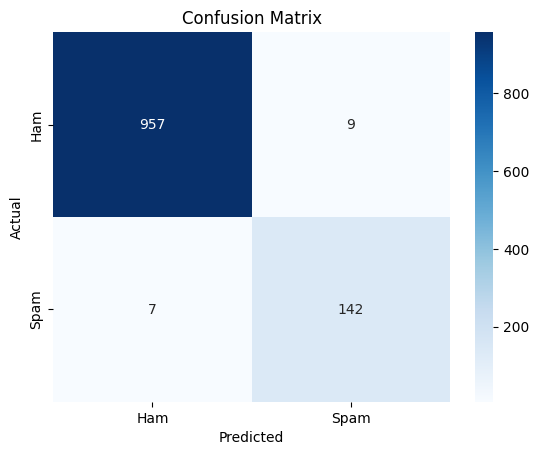

Prediction: Spam


In [1]:
# 🧰 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 📥 Load Dataset
# Replace 'spam.csv' with the path to your dataset
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv', 
                 sep='\t', header=None, names=['label', 'message'])

print(df.head())

# 🔁 Convert Labels to Binary
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# 🧹 Text Preprocessing & Vectorization
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message'])
y = df['label']

# 🧪 Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Train Naive Bayes Model
model = MultinomialNB()
model.fit(X_train, y_train)

# 📈 Evaluate Model
y_pred = model.predict(X_test)

print("🔍 Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))

# 🧮 Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 🔮 Predict New Email
sample_email = ["Congratulations! You've won a free ticket. Reply now!"]
sample_vec = vectorizer.transform(sample_email)
pred = model.predict(sample_vec)
print("Prediction:", "Spam" if pred[0] == 1 else "Not Spam")


Task 2: Predicting Tumor Malignancy<br>
Dataset: Use a dataset that contains features from tumor datasets such as size and shape indicators.

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

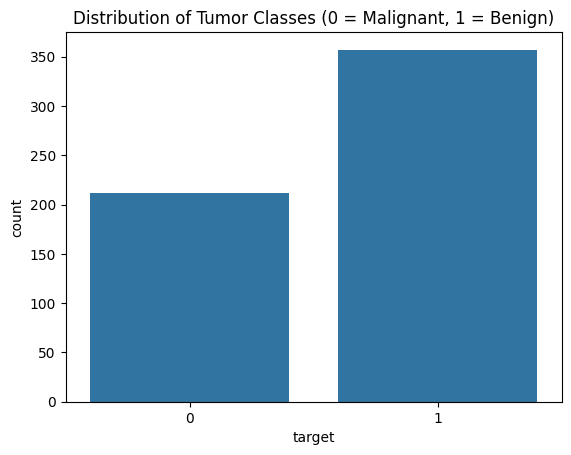

✅ Accuracy Score: 0.9649122807017544

🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



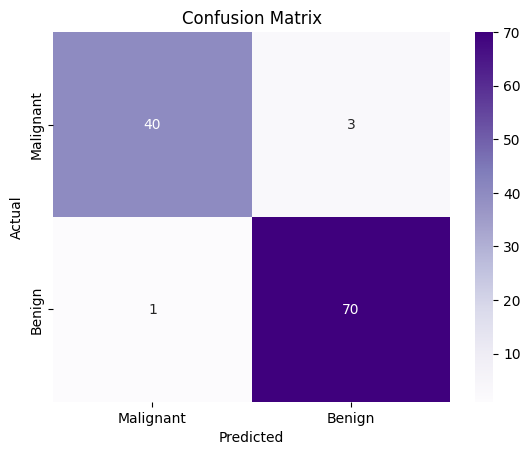

Prediction for sample input: Benign


In [2]:
# 🧰 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 📥 Load Breast Cancer Dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # 0 = malignant, 1 = benign

print(df.head())

# 🔍 Check class balance
sns.countplot(x='target', data=df)
plt.title("Distribution of Tumor Classes (0 = Malignant, 1 = Benign)")
plt.show()

# 🎯 Features and Labels
X = df.drop('target', axis=1)
y = df['target']

# 🧪 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 📈 Make Predictions
y_pred = model.predict(X_test)

# 📊 Evaluate Model
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n🔍 Classification Report:\n", classification_report(y_test, y_pred))

# 🧮 Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Purples", xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 🔮 Predict on New Sample (dummy input)
sample_input = X_test.iloc[[0]]  # Just for demo
sample_prediction = model.predict(sample_input)
print("Prediction for sample input:", "Benign" if sample_prediction[0] == 1 else "Malignant")


Task 3: Wine Quality Classification<br>
Dataset: Use a dataset that contains chemical properties of wine along with a quality rating.
Treat quality as a binary classification (high vs. low).

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

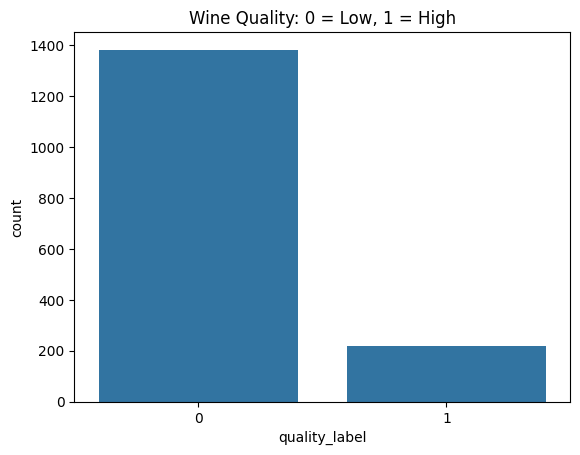

✅ Accuracy: 0.9

🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320



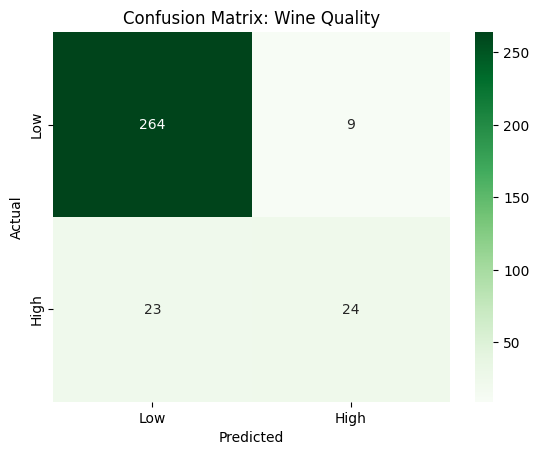

Prediction for sample wine: Low Quality


In [3]:
# 🧰 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 📥 Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

print(df.head())
print(df['quality'].value_counts())

# 🧮 Binary Classification: High (>=7) vs Low (<7)
df['quality_label'] = df['quality'].apply(lambda q: 1 if q >= 7 else 0)

# 📊 Visualize class distribution
sns.countplot(x='quality_label', data=df)
plt.title("Wine Quality: 0 = Low, 1 = High")
plt.show()

# 🎯 Features and Target
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

# 🧪 Split and Scale Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🧠 Train Model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 📈 Predictions and Evaluation
y_pred = model.predict(X_test_scaled)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔍 Classification Report:\n", classification_report(y_test, y_pred))

# 🧮 Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Greens", xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title("Confusion Matrix: Wine Quality")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 🔮 Predict on New Sample
sample_input = pd.DataFrame([X.iloc[0]])
sample_scaled = scaler.transform(sample_input)
pred = model.predict(sample_scaled)
print("Prediction for sample wine:", "High Quality" if pred[0] == 1 else "Low Quality")
